In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from visualization.utils import count_of_appointment, age_related_diseases 
from data_preprocessing.utils import preprocess_categorical_to_binary, change_age_range
%matplotlib inline

In [3]:
df = pd.read_csv('../data/raw/KaggleV2-May-2016.csv') 

#### ### sum appoitments 
appoitment_pro_person = df.PatientId.value_counts().reset_index().head(100)
appoitment_pro_person['ind'] = appoitment_pro_person.index
df['sum_appoitments'] = df.groupby('PatientId')['AppointmentID'].transform('count')
df['sum_app_for_age'] = df.groupby('Age')['sum_appoitments'].transform('sum')


count_of_appointment(plot_name = 'count_of_appointment_pro_person',x = appoitment_pro_person['ind'],y = appoitment_pro_person['PatientId'],xlabel = 'Next person',ylabel = 'Count of appointment',alpha=0.5)
count_of_appointment(plot_name = 'dependence_of_visits_from_age_for_each_patient',x = df['Age'],y = df['sum_appoitments'],xlabel = 'Age',ylabel = 'Sum of appointment for each patient',alpha=0.005)
count_of_appointment(plot_name = 'sum_of_visit_in_dependence_from_age',x = df['Age'],y = df['sum_app_for_age'],xlabel = 'Age',ylabel = 'Sum of appointment for every age',alpha=0.01)

"""
Age column
- min is -1 what means that here we have some mistake
- max value is 115. We can drop all values which are more then 100"""

### Correlation for numeric values
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

"""




In [10]:
df = preprocess_categorical_to_binary(df)
df = change_age_range(df)
df_prep_corr = df.corr().abs()
pd.options.display.max_rows = 100
s = df_prep_corr.unstack()
s = s.sort_values(kind="quicksort",ascending=False)
s = pd.DataFrame(s[s<1])[:20]
s.to_csv('../reports/tables/correlation_with_data_change_to_numeric.csv')


/home/kasia/Python Projects/Medical-Appoitnment-No-Show/src/data_preprocessing/utils.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col][X[col]<0]=0
/home/kasia/Python Projects/Medical-Appoitnment-No-Show/src/data_preprocessing/utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col][X[col]>95]=95


No-show  Gender
0        0         57246
         1         30962
1        0         14594
         1          7725
Name: Gender, dtype: int64
0    0.796854
1    0.800321
Name: Gender, dtype: float64


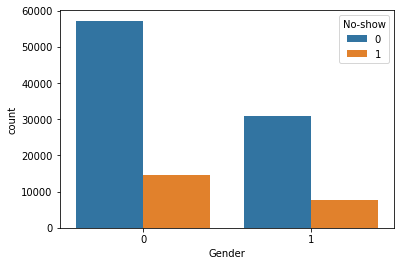

In [26]:
sns.countplot(x="Gender", hue="No-show", data=df)
plt.savefig('../reports/figures/show_no_show_in_dependence_from_gender.png')
#Show, No-Show
print(df.groupby('No-show')['Gender'].value_counts())
# Percentage of woman/man who don't go to doctor
print(df.Gender[df['No-show']==0].value_counts()/df.Gender.value_counts())

0    0.796854
1    0.430986
Name: Gender, dtype: float64